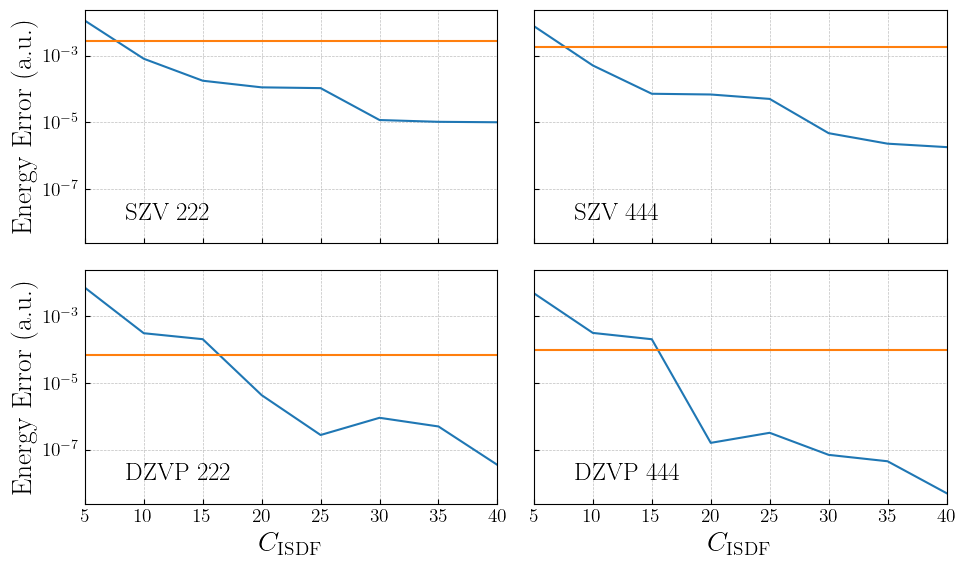

In [54]:
from utils import *

import os, sys, numpy, scipy
from matplotlib import pyplot as plt

if not os.path.exists("./figures"):
    os.makedirs("./figures")

def get_data(x0, y0):
    xx = []
    yy = []
    for ix in range(len(x0)):
        if not numpy.isnan(y0[ix]):
            xx.append(x0[ix])
            yy.append(y0[ix])
    return xx, yy

def plot_results(log, ax=None):
    cell = "Diamond"
    basis = log.split("-")[0].upper()
    kmesh = "".join(log.split("-")[1:])
    kmesh = kmesh.split(".")[0]

    x = []
    d = {}

    for section in open(log).read().split("--"):
        lines = section.split("\n")
        if len(lines[0]) == 0:
            lines = lines[1:]

        if "fftisdf" in lines[0]:
            t_build = float(lines[1].split()[-2])
            t_getjk = float(lines[2].split()[-2])
            ncycle = float(lines[3].split()[2][:-1])
            e_hf = float(lines[3].split()[-1])
            chksize = float(lines[4].split()[-2])

            d[int(lines[0].split("-")[1])] = {
                "t_build": t_build,
                "t_getjk": t_getjk / ncycle,
                "e_hf": e_hf,
                "chksize": chksize,
            }

            x.append(int(lines[0].split("-")[1]))

        elif "gdf" in lines[0]:
            t_build = float(lines[1].split()[-2])
            t_getjk = float(lines[2].split()[-2])
            ncycle = float(lines[3].split()[2][:-1])
            e_hf = float(lines[3].split()[-1])
            chksize = float(lines[4].split()[-2])

            d["gdf"] = {
                "t_build": t_build,
                "t_getjk": t_getjk / ncycle,
                "e_hf": e_hf,
                "chksize": chksize,
            }

        elif "fftdf" in lines[0]:
            t_build = numpy.nan
            t_getjk = float(lines[2].split()[-2])
            ncycle = float(lines[3].split()[2][:-1])
            e_hf = float(lines[3].split()[-1])
            chksize = numpy.nan

            d["fftdf"] = {
                "t_build": t_build,
                "t_getjk": t_getjk / ncycle,
                "e_hf": e_hf,
                "chksize": chksize,
            }

    x = numpy.array(sorted(x))
    ax.semilogy(x, [abs(d[i]["e_hf"] - d["fftdf"]["e_hf"]) / 2 for i in x], label="FFTISDF")
    ax.semilogy(x, [abs(d["gdf"]["e_hf"] - d["fftdf"]["e_hf"]) for i in x], label="GDF")
    ax.text(0.1, 0.1, f"{basis} {kmesh}", transform=ax.transAxes)

fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
plot_results("szv-2-2-2.log", ax[0][0])
plot_results("szv-4-4-4.log", ax[0][1])
plot_results("dzvp-2-2-2.log", ax[1][0])
plot_results("dzvp-4-4-4.log", ax[1][1])

ax[1, 0].set_xlabel(r"$C_{\text{ISDF}}$")
ax[1, 1].set_xlabel(r"$C_{\text{ISDF}}$")
ax[0, 0].set_ylabel(r"Energy Error (a.u.)")
ax[1, 0].set_ylabel(r"Energy Error (a.u.)")
ax[0, 0].set_xlim(5, 40)
fig.tight_layout()
fig.savefig("rhf-ene-err.png", dpi=300)


